### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import zscore as zs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering

In [3]:
df_vehicle=pd.read_csv('C:/Users/KSK/Downloads/unsupervised learning day1,day2 inclass,take home/usl project/vehicle.csv')

In [4]:
df_vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

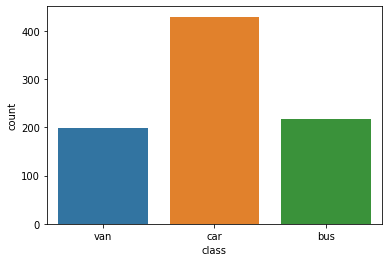

In [5]:
sns.countplot(df_vehicle['class'])
plt.show()

### 3. Check for any missing values in the data 

In [7]:
df_vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# handling missing values

In [12]:
df_vehicle['circularity'].unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [14]:
mean_circ=df_vehicle['circularity'].mean()

In [20]:
df_vehicle['circularity'].fillna(44.8,inplace=True)

In [21]:
df_vehicle['circularity'].unique()

array([48.        , 41.        , 50.        , 44.        , 44.82877527,
       43.        , 34.        , 36.        , 46.        , 42.        ,
       49.        , 55.        , 54.        , 56.        , 47.        ,
       37.        , 39.        , 53.        , 45.        , 38.        ,
       35.        , 40.        , 59.        , 52.        , 51.        ,
       58.        , 57.        , 33.        ])

In [22]:
df_vehicle['distance_circularity'].unique()

array([ 83.,  84., 106.,  82.,  70.,  73.,  66.,  62.,  98.,  74.,  85.,
        79., 103.,  51.,  77., 100.,  75.,  53.,  64., 105.,  80.,  54.,
        63., 107.,  nan,  72.,  86.,  68., 104.,  87.,  76.,  81.,  71.,
       101.,  96.,  78., 108.,  91.,  89.,  94.,  92.,  60.,  57.,  65.,
        50.,  88., 109.,  95.,  90.,  58.,  69.,  47.,  40.,  59., 110.,
        93., 102., 112.,  61.,  42.,  49.,  44.,  52.,  55.])

In [23]:
mean_circ_dist=df_vehicle['distance_circularity'].mean()

In [24]:
mean_circ_dist

82.1104513064133

In [25]:
df_vehicle['distance_circularity'].fillna(82,inplace=True)

In [26]:
df_vehicle['radius_ratio'].unique()

array([178., 141., 209., 159., 205., 172., 173., 157., 140.,  nan, 143.,
       136., 171., 144., 203., 201., 109., 197., 186., 215., 153., 121.,
       148., 219., 154., 119., 193., 129., 160., 151., 222., 177., 118.,
       306., 176., 169., 214., 105., 137., 183., 220., 145., 133., 122.,
       147., 115., 174., 228., 175., 185., 195., 221., 212., 135., 120.,
       156., 125., 164., 161., 227., 191., 111., 170., 113., 127., 188.,
       180., 116., 158., 162., 211., 152., 124., 252., 150., 130., 198.,
       202., 199., 128., 142., 163., 155., 184., 165., 322., 194., 218.,
       216., 223., 149., 131., 139., 179., 166., 187., 167., 231., 168.,
       126., 206., 210., 110., 189., 134., 132., 230., 196., 208., 138.,
       200., 225., 246., 207., 192., 117., 123., 146., 190., 182., 204.,
       224., 333., 213., 226., 238., 181., 114., 104., 112., 234., 235.,
       250., 232., 217.])

In [27]:
mean_radius_ratio=df_vehicle['radius_ratio'].mean()

In [28]:
mean_radius_ratio

168.88809523809525

In [29]:
df_vehicle['radius_ratio'].fillna(168,inplace=True)

In [30]:
df_vehicle['pr.axis_aspect_ratio'].unique()

array([ 72.,  57.,  66.,  63., 103.,  50.,  65.,  61.,  62.,  55.,  68.,
        58.,  71.,  52.,  69.,  nan,  64.,  59.,  67., 126.,  54.,  73.,
        51.,  70.,  53.,  56.,  74.,  60.,  76.,  75.,  49., 133.,  47.,
       102., 138.,  48.,  97., 105.])

In [31]:
mean_pr_ax=df_vehicle['pr.axis_aspect_ratio'].mean()

In [32]:
mean_pr_ax

61.67890995260664

In [33]:
df_vehicle['pr.axis_aspect_ratio'].fillna(61,inplace=True)

In [34]:
df_vehicle['scatter_ratio'].dtype

dtype('float64')

In [35]:
df_vehicle['scatter_ratio'].unique()

array([162., 149., 207., 144., 255., 153., 137., 122., 183., 133., 123.,
       152., 174., 204., 118., 177., 216., 208., 154., 150., 143., 147.,
       128., 218., 192., 146., 155., 140., 142., 164., 157., 151., 205.,
       119., 158., 213., 159., 130., 148., 156., 163., 210., 257., 185.,
       209., 193., 184., 225., 190., 215., 224., 176., 126., 195., 172.,
       127., 261., 171., 125., 169., 197., 145., 214., 201., 114., 194.,
       220., 221., 173., 134., 160., 121., 199., 186., 161., 222., 136.,
       187., 250., 202., 166., 132., 211., 247., 116., 203., 181., 240.,
       219., 212., 138., 131., 117., 112., 165.,  nan, 226., 129., 175.,
       135., 217., 200., 241., 198., 120., 260., 188., 170., 234., 236.,
       168., 167., 227., 139., 256., 206., 141., 238., 178., 223., 252.,
       239., 115., 191., 179., 251., 262., 196., 180., 189., 237., 265.])

In [36]:
mean_scatter_ratio=df_vehicle['scatter_ratio'].mean()

In [37]:
mean_scatter_ratio

168.901775147929

In [38]:
df_vehicle['scatter_ratio'].fillna(168,inplace=True)

In [39]:
df_vehicle['elongatedness'].dtype

dtype('float64')

In [40]:
df_vehicle['elongatedness'].unique()

array([42., 45., 32., 46., 26., 48., 54., 36., 50., 43., 44., 37., 57.,
       31., 55., 53., 33., 47., 40., 51., 34., 52., 35., 30., 38., 56.,
       39., 58., 59., 49., 27., 41., nan, 61., 28., 29.])

In [41]:
df_vehicle['elongatedness'].mean()

40.933727810650886

In [42]:
df_vehicle['elongatedness'].fillna(40,inplace=True)

In [43]:
df_vehicle['pr.axis_rectangularity'].dtype

dtype('float64')

In [44]:
df_vehicle['pr.axis_rectangularity'].unique()

array([20., 19., 23., 28., 18., 17., 22., 21., 24., 25., nan, 27., 26.,
       29.])

In [45]:
df_vehicle['pr.axis_rectangularity'].mean()

20.582443653618032

In [46]:
df_vehicle['pr.axis_rectangularity'].fillna(20.5,inplace=True)

In [47]:
df_vehicle['scaled_variance'].dtype

dtype('float64')

In [48]:
df_vehicle['scaled_variance'].unique()

array([176., 170., 223., 160., 241., 280., 162., 141., 202., 153., 148.,
       180., 173., 196., 227., 137., 225., 175., 169., 164., 221., 143.,
       229., 217., 168., 165., 232., 186., 174., 272., 235., 135., 178.,
       191., 159., 172., 184., 181., 236., 275., 154., 222., 214., 145.,
       203., 231., 208., 226., 210., 197., 171., 155., 278., 189., 142.,
       218., 179., 166., 237.,  nan, 212., 177., 167., 132., 151., 216.,
       219., 157., 224., 188., 161., 207., 156., 152., 220., 266., 228.,
       185., 209., 204., 182., 200., 258., 146., 183., 163., 238., 194.,
       134., 206., 136., 130., 190., 158., 147., 140., 265., 211., 138.,
       247., 288., 234., 243., 256., 195., 213., 187., 205., 262., 320.,
       285., 215., 150., 139., 267., 149., 193., 230., 254., 269., 264.,
       199., 192., 144., 131., 246., 287., 240., 263.])

In [49]:
df_vehicle['scaled_variance'].mean()

188.63107947805457

In [50]:
df_vehicle['scaled_variance'].fillna(188.6,inplace=True)

In [51]:
df_vehicle['scaled_variance.1'].dtype

dtype('float64')

In [55]:
df_vehicle['scaled_variance.1'].unique()

array([ 379.,  330.,  635.,  309.,  325.,  957.,  361.,  281.,  223.,
        505.,  266.,  224.,  349.,  345.,  465.,  624.,  206.,  485.,
        686.,  651.,  354.,  221.,  344.,  307.,  623.,  324.,  238.,
        696.,  570.,  314.,  356.,  293.,  304.,  641.,  402.,  363.,
        340.,  346.,  691.,  336.,  628.,  207.,  366.,  405.,  675.,
        371.,  253.,  317.,  352.,  404.,  299.,  355.,  661.,  341.,
        956.,  265.,  512.,  653.,  241.,  567.,  247.,  269.,  333.,
        523.,  323.,  748.,  305.,  558.,  683.,  732.,  466.,  227.,
        338.,  571.,  445.,  666.,  328.,  343.,  671.,  242.,  311.,
        342.,  998.,  209.,  446.,  229.,  703.,  430.,  583.,  312.,
        308.,  337.,  602.,  321.,  326.,  347.,  246.,  194.,  576.,
        711.,  575.,  331.,  329.,  524.,  357.,  315.,  192.,  351.,
        611.,  712.,  463.,  370.,  319.,  216.,  365.,  605.,  578.,
        511.,  261.,  669.,  364.,  264.,  230.,  373.,  320.,  670.,
        406.,  728.,

In [56]:
df_vehicle['scaled_variance.1'].mean()

439.49407582938386

In [57]:
df_vehicle['scaled_variance.1'].fillna(439.4,inplace=True)

In [58]:
df_vehicle['scaled_radius_of_gyration'].mean()

174.70971563981044

In [59]:
df_vehicle['scaled_radius_of_gyration'].fillna(174.7,inplace=True)

In [60]:
df_vehicle['scaled_radius_of_gyration.1'].mean()

72.44774346793349

In [61]:
df_vehicle['scaled_radius_of_gyration.1'].fillna(72.4,inplace=True)

In [62]:
df_vehicle['skewness_about'].mean()

6.364285714285714

In [63]:
df_vehicle['skewness_about'].fillna(6.3,inplace=True)

In [64]:
df_vehicle['skewness_about.1'].mean()

12.602366863905326

In [65]:
df_vehicle['skewness_about.1'].fillna(12.6,inplace=True)

In [66]:
df_vehicle['skewness_about.2'].mean()

188.91952662721894

In [67]:
df_vehicle['skewness_about.2'].fillna(188.9,inplace=True)

In [68]:
df_vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 4. Standardize the data 

In [71]:
from scipy.stats import zscore as zs

In [73]:
df_vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [75]:
df_vehicle_X=df_vehicle.drop('class',axis=1)

In [76]:
df_vehicle_X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


# label encoding

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le=LabelEncoder()

In [79]:
df_vehicle['class']=le.fit_transform(df_vehicle['class'])

In [80]:
df_vehicle['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [81]:
df_vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

# zscores

In [82]:
df_vehicle_X_zs=df_vehicle_X.apply(zs)

In [83]:
df_vehicle_X_zs.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056579,0.273153,1.310398,0.311542,-0.208006,0.13672,-0.225047,0.758332,-0.403073,-0.343026,0.285618,-0.327908,-0.074247,0.380666,-0.312189,0.183957
1,-0.325470,-0.624564,0.120145,-0.835252,-0.593753,0.094079,-0.599860,0.52099,-0.611625,-0.344578,-0.594542,-0.620878,-0.513718,-0.059957,0.537966,0.156589,0.013092,0.452977
2,1.254193,0.843549,1.518604,1.201816,0.548738,0.311542,1.148414,-1.14418,0.934687,0.689401,1.096768,1.108604,1.392392,0.074019,1.558322,-0.403603,-0.149549,0.049447
3,-0.082445,-0.624564,-0.006988,-0.296028,0.167907,0.094079,-0.750573,0.64908,-0.611625,-0.344578,-0.913657,-0.739957,-1.466773,-1.265739,-0.074247,-0.291565,1.639497,1.529056
4,-1.054545,-0.135193,-0.769784,1.081989,5.245643,9.444962,-0.599860,0.52099,-0.611625,-0.275646,1.671175,-0.649230,0.408593,7.308711,0.537966,-0.179526,-1.450673,-1.699181


### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [87]:
kmeans=KMeans(n_clusters=10)

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [88]:
kmeans.fit(df_vehicle_X_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# centroids

In [86]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_vehicle_X_zs))
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.378047,-0.834743,-0.799122,-0.551813,-0.137245,-0.221659,-0.988237,1.019803,-0.944305,-0.728343,-0.968889,-0.907452,-0.889441,-0.914052,0.269142,-0.456390,1.176441,0.945749
1,1.593590,1.499743,1.231460,0.584085,-0.725074,-0.618297,2.267850,-1.740462,2.361026,1.309788,2.519581,2.506464,2.052852,1.436876,0.003159,0.202950,-0.884235,-1.555394
2,-0.727064,-0.033385,-0.344205,-0.567977,-0.013955,0.016965,-0.494040,0.397443,-0.501957,0.060702,-0.471649,-0.540245,-0.004593,0.258735,-0.253280,-0.444128,-0.609787,-0.408458
3,-0.735574,0.068712,-0.277145,2.973016,6.927642,8.846940,-0.543343,0.472957,-0.563303,0.275809,1.679153,-0.590399,0.197230,4.964135,-0.278318,-0.221541,-0.698460,-0.438151
4,-0.997786,-0.821324,-1.157873,-1.313379,-0.812563,-0.495358,-0.921316,1.101609,-0.877397,-0.842067,-0.969503,-0.903504,-0.625487,1.007266,0.003488,-0.178789,-1.231322,-1.396533
5,0.311956,0.186907,0.301686,0.641521,0.429325,-0.060724,0.189469,-0.415804,0.135322,0.099390,0.218282,0.143977,0.100375,-0.608349,0.160262,-0.170981,0.853861,0.675260
6,-0.242738,-1.100052,-0.206478,0.177546,0.247585,-0.259875,-0.302602,0.098566,-0.368985,-1.080096,-0.212758,-0.331927,-1.111585,-0.632347,-0.619160,0.965887,0.859169,0.734875
7,1.195867,1.268347,1.289765,1.019978,0.157117,0.373519,1.285714,-1.215270,1.285506,1.223967,1.111862,1.270648,1.098790,-0.223407,0.243083,0.312658,0.002520,0.356802


# inertia

In [93]:
cluster_range=range(1,11)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10)
    clusters.fit(df_vehicle_X_zs)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:15]
    

,num_clusters,cluster_errors
0,1,15228.000000
1,2,8991.091195
2,3,7336.802665
3,4,6008.753113
4,5,5434.096476
5,6,4956.848761
6,7,4557.780150
7,8,4274.219634
8,9,4027.309635
9,10,3814.069615


### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

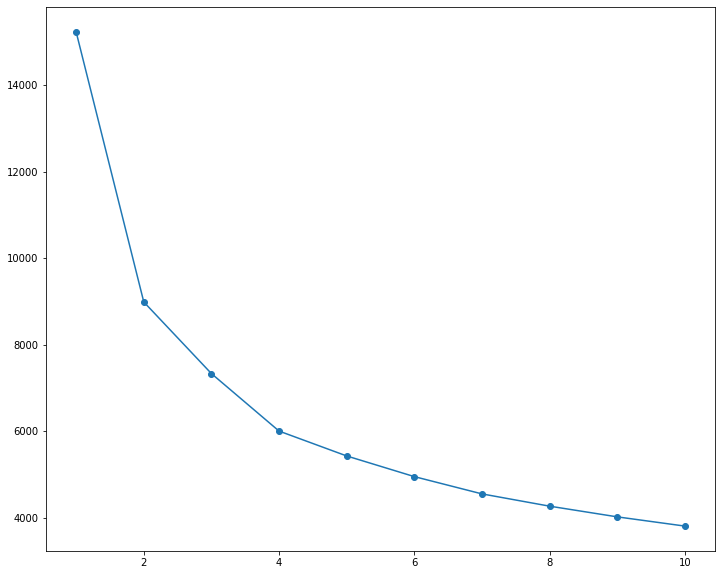

In [94]:
plt.figure(figsize=(12,10))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

### 8. Find out the optimal value of K

In [95]:
kmeans1=KMeans(n_clusters=5,n_init=15)

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [96]:
kmeans1.fit(df_vehicle_X_zs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [97]:
centroids1 = kmeans1.cluster_centers_
centroid_df1 = pd.DataFrame(centroids1, columns = list(df_vehicle_X_zs))
centroid_df1

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.022586,0.011056,0.092276,0.215158,0.269212,-0.041968,-0.078823,-0.117567,-0.126022,0.000081,-0.038748,-0.124561,-0.006371,-0.347443,0.079460,-0.153586,0.388047,0.367500
1,1.222802,1.261205,1.276522,0.971273,0.054187,0.249928,1.381140,-1.264265,1.391332,1.196337,1.267441,1.392547,1.177314,-0.051025,0.184243,0.279178,-0.077716,0.145286
2,-1.000416,-0.604057,-0.997178,-1.139586,-0.585098,-0.374453,-0.817983,0.927967,-0.784706,-0.604953,-0.841276,-0.815863,-0.452594,0.847303,-0.117009,-0.264574,-1.098778,-1.200883
3,-0.359493,-0.986233,-0.591435,-0.284901,0.032259,-0.227765,-0.749540,0.682018,-0.749688,-0.892882,-0.712414,-0.712641,-1.047253,-0.819102,-0.185029,0.138023,1.069698,0.904162
4,-0.735574,0.068712,-0.277145,2.973016,6.927642,8.846940,-0.543343,0.472957,-0.563303,0.275809,1.679153,-0.590399,0.197230,4.964135,-0.278318,-0.221541,-0.698460,-0.438151


### 11. Use kmeans.labels_ function to print out the labels of the classes

In [99]:
df_labels1 = pd.DataFrame(kmeans1.labels_ , columns = list(['cluster_number']))
df_labels1['cluster_number'] = df_labels1['cluster_number'].astype('category')
df_labels1['cluster_number']

0      0
1      3
2      1
3      3
4      4
      ..
841    0
842    0
843    1
844    3
845    2
Name: cluster_number, Length: 846, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]